# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellis'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [4]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    7/9/2021
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-9-2021">
     14,499.31330
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-9-2021">
     USD IDR rate for 7/9/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    7/8/2021
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7


Finding row length.

In [6]:
tr = table.find_all('tr',attrs={'class':""})
tr[:5]

[<tr><td>7/9/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/7-9-2021">14,499.31330</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-9-2021">USD IDR rate for 7/9/2021</a></td></tr>,
 <tr><td>7/8/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/7-8-2021">14,515.87714</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-8-2021">USD IDR rate for 7/8/2021</a></td></tr>,
 <tr><td>7/7/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/7-7-2021">14,503.93654</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2021">USD IDR rate for 7/7/2021</a></td></tr>,
 <tr><td>7/6/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/7-6-2021">14,469.58258</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-6-2021">USD IDR rate for 7/6/2021</a></td></tr>,
 <tr><td>7/5/2021</td><td>Monday</td><td><a href="/Rate/USD/IDR/7-5-2021">14,493.33968</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rat

In [7]:
tr = table.find_all('tr',attrs={'class':""})
row_length = len(tr)
row_length

130

Do the scrapping process here (please change this markdown with your explanation)

In [8]:
temp = [] #initiating a tuple
for i in range(1, len(tr)):
    row = table.find_all('tr',attrs={'class':""})[i]
    
    #get date
    date = row.find_all('td')[0].text
    date = date.strip()
    
    #get day
    day = row.find_all('td')[1].text
    day = day.strip()
    
    #get IDR rate
    idr = row.find_all('td')[2].text
    idr = idr.strip()
    
    #get remarks
    remarks = row.find_all('td')[3].text
    remarks = remarks.strip()
    
    temp.append((date,day,idr,remarks))
temp

[('7/8/2021', 'Thursday', '14,515.87714 IDR', 'USD IDR rate for 7/8/2021'),
 ('7/7/2021', 'Wednesday', '14,503.93654 IDR', 'USD IDR rate for 7/7/2021'),
 ('7/6/2021', 'Tuesday', '14,469.58258 IDR', 'USD IDR rate for 7/6/2021'),
 ('7/5/2021', 'Monday', '14,493.33968 IDR', 'USD IDR rate for 7/5/2021'),
 ('7/2/2021', 'Friday', '14,497.65100 IDR', 'USD IDR rate for 7/2/2021'),
 ('7/1/2021', 'Thursday', '13,270.37815 IDR', 'USD IDR rate for 7/1/2021'),
 ('6/30/2021', 'Wednesday', '14,491.89811 IDR', 'USD IDR rate for 6/30/2021'),
 ('6/29/2021', 'Tuesday', '13,215.84052 IDR', 'USD IDR rate for 6/29/2021'),
 ('6/28/2021', 'Monday', '14,439.22236 IDR', 'USD IDR rate for 6/28/2021'),
 ('6/25/2021', 'Friday', '14,426.82283 IDR', 'USD IDR rate for 6/25/2021'),
 ('6/24/2021', 'Thursday', '14,436.21247 IDR', 'USD IDR rate for 6/24/2021'),
 ('6/23/2021', 'Wednesday', '14,440.32729 IDR', 'USD IDR rate for 6/23/2021'),
 ('6/22/2021', 'Tuesday', '14,396.08712 IDR', 'USD IDR rate for 6/22/2021'),
 ('6/2

In [9]:
temp = [] #initiating a tuple
for i in range(1, len(tr)):
    row = table.find_all('tr',attrs={'class':""})[i]
    #date
    date = row.find_all('td')[0].text
    date = date.strip() 
    #day
    day = row.find_all('td')[1].text
    day = day.strip()
    #IDR Rate
    idr = row.find_all('td')[2].text
    idr = idr.strip()
    #remarks
    remarks = row.find_all('td')[3].text
    remarks = remarks.strip()
    
    temp.append((date,day,idr,remarks))
temp

[('7/8/2021', 'Thursday', '14,515.87714 IDR', 'USD IDR rate for 7/8/2021'),
 ('7/7/2021', 'Wednesday', '14,503.93654 IDR', 'USD IDR rate for 7/7/2021'),
 ('7/6/2021', 'Tuesday', '14,469.58258 IDR', 'USD IDR rate for 7/6/2021'),
 ('7/5/2021', 'Monday', '14,493.33968 IDR', 'USD IDR rate for 7/5/2021'),
 ('7/2/2021', 'Friday', '14,497.65100 IDR', 'USD IDR rate for 7/2/2021'),
 ('7/1/2021', 'Thursday', '13,270.37815 IDR', 'USD IDR rate for 7/1/2021'),
 ('6/30/2021', 'Wednesday', '14,491.89811 IDR', 'USD IDR rate for 6/30/2021'),
 ('6/29/2021', 'Tuesday', '13,215.84052 IDR', 'USD IDR rate for 6/29/2021'),
 ('6/28/2021', 'Monday', '14,439.22236 IDR', 'USD IDR rate for 6/28/2021'),
 ('6/25/2021', 'Friday', '14,426.82283 IDR', 'USD IDR rate for 6/25/2021'),
 ('6/24/2021', 'Thursday', '14,436.21247 IDR', 'USD IDR rate for 6/24/2021'),
 ('6/23/2021', 'Wednesday', '14,440.32729 IDR', 'USD IDR rate for 6/23/2021'),
 ('6/22/2021', 'Tuesday', '14,396.08712 IDR', 'USD IDR rate for 6/22/2021'),
 ('6/2

In [10]:
temp = temp[::-1]
temp[:10]

[('1/11/2021', 'Monday', '14,137.24151 IDR', 'USD IDR rate for 1/11/2021'),
 ('1/12/2021', 'Tuesday', '14,074.81444 IDR', 'USD IDR rate for 1/12/2021'),
 ('1/13/2021', 'Wednesday', '14,125.90174 IDR', 'USD IDR rate for 1/13/2021'),
 ('1/14/2021', 'Thursday', '14,070.58746 IDR', 'USD IDR rate for 1/14/2021'),
 ('1/15/2021', 'Friday', '14,153.46654 IDR', 'USD IDR rate for 1/15/2021'),
 ('1/18/2021', 'Monday', '14,055.43768 IDR', 'USD IDR rate for 1/18/2021'),
 ('1/19/2021', 'Tuesday', '14,063.60877 IDR', 'USD IDR rate for 1/19/2021'),
 ('1/20/2021', 'Wednesday', '14,021.43046 IDR', 'USD IDR rate for 1/20/2021'),
 ('1/21/2021', 'Thursday', '13,964.91920 IDR', 'USD IDR rate for 1/21/2021'),
 ('1/22/2021', 'Friday', '14,025.60268 IDR', 'USD IDR rate for 1/22/2021')]

## Creating data frame & Data wrangling

1. Sub-Setting dan ambil kolom "date" dan "IDR" dan dibutuhkan untuk pembuatan plot
2. Ubah tipe data (astype) utk kolom "date" dari object menjadi datetime64, dan kolom "IDR" dari object menjadi float
3. Melakukan set_index

In [11]:
import pandas as pd

exchange = pd.DataFrame(temp, columns = ('date','day','idr','remarks'))
exchange.head()

,date,day,idr,remarks
0,1/11/2021,Monday,"14,137.24151 IDR",USD IDR rate for 1/11/2021
1,1/12/2021,Tuesday,"14,074.81444 IDR",USD IDR rate for 1/12/2021
2,1/13/2021,Wednesday,"14,125.90174 IDR",USD IDR rate for 1/13/2021
3,1/14/2021,Thursday,"14,070.58746 IDR",USD IDR rate for 1/14/2021
4,1/15/2021,Friday,"14,153.46654 IDR",USD IDR rate for 1/15/2021


In [12]:
exchange.dtypes

date       object
day        object
idr        object
remarks    object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [13]:
exchange = exchange[['date','idr']]
exchange['idr'] = exchange['idr'].replace('IDR',"",regex=True).replace(',',"",regex=True)
exchange['idr'] = exchange['idr'].astype('float64')
exchange['date'] = exchange['date'].astype('datetime64')
exchangerate= exchange.set_index('date')
exchangerate

,idr
date,
2021-01-11,14137.24151
2021-01-12,14074.81444
2021-01-13,14125.90174
2021-01-14,14070.58746
2021-01-15,14153.46654
...,...
2021-07-02,14497.65100
2021-07-05,14493.33968
2021-07-06,14469.58258


In [14]:
exchange.dtypes

date    datetime64[ns]
idr            float64
dtype: object

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

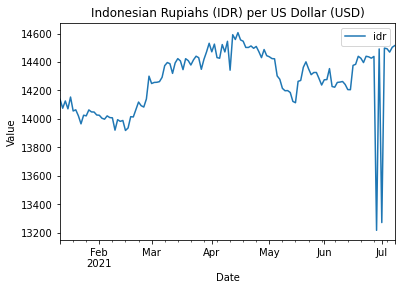

In [16]:
exchangerate.plot(xlabel='Date',ylabel='Value',title='Indonesian Rupiahs (IDR) per US Dollar (USD)')

Terjadi volatility nilai tukar IDR terhadap USD (IDR/USD)sepanjang awal 2021 - Juli 2021, dimana volatility yang cukup significant terjadi dibulan Juli 2021 yaitu naik turun sekitar (+/-) 9%.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.